# VCHE Benchmark Analysis and Graphs For DS **Packed** -- 1000 runs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
# Import the results for each benchmark Ran on cluster Nov 26th commit c0f814662d3aae232da28f868cc069aed8b1484e
# avgeraged 1000 runs
# PN15 -- CLUSTER
ds_bench={'Type':"baseline",  'PN':15, 'LogT': 56, 'Lbd': 0,  'Ecd': 5.364051E+06,   'Enc': 1.24771280E+08, 'Eval': 1.875389310E+09, 'Verif': 0          ,  'Dec':3.0026985E+07, 'Dcd': 8.577144E+06}
ds_V1   ={'Type':"REP"      , 'PN':15, 'LogT': 56, 'Lbd': 64, 'Ecd': 3.451231370E+09,'Enc': 5.789770560E+09,'Eval': 2.1508359418E+10,'Verif': 8.4219630E+07,'Dec':2.8446248E+07, 'Dcd': 9.841151E+06}
ds_V2   ={'Type':"PE"       , 'PN':15, 'LogT': 56, 'Lbd': 54, 'Ecd': 2.12495703E+08, 'Enc': 2.05635505E+08, 'Eval': 6.407897396E+09, 'Verif': 3.836896E+06, 'Dec':8.7296244E+07, 'Dcd': 6.6312300E+07}
timings={'Bench':ds_bench, 'REP':ds_V1, 'PE':ds_V2}

In [3]:
pd.DataFrame(createDFDiffR(timings))

,,Ecd,Enc,Eval,Dec,Verif,Dcd
Create,REP,26.479107,43.531601,0.000000,0.000000,0.000000,0.000000
Eval.,REP,0.000000,0.000000,10.468744,0.000000,0.000000,0.000000
Verify,REP,0.000000,0.000000,0.000000,0.000000,2.181622,0.032743
Create,PE,1.591663,0.621386,0.000000,0.000000,0.000000,0.000000
Eval.,PE,0.000000,0.000000,2.416836,0.000000,0.000000,0.000000
Verify,PE,0.000000,0.000000,0.000000,1.483501,0.099391,1.495569


In [4]:
pd.DataFrame(timings)

,Bench,REP,PE
Type,baseline,REP,PE
PN,15,15,15
LogT,56,56,56
Lbd,0,64,54
Ecd,5364051.0,3451231370.0,212495703.0
Enc,124771280.0,5789770560.0,205635505.0
Eval,1875389310.0,21508359418.0,6407897396.0
Verif,0,84219630.0,3836896.0
Dec,30026985.0,28446248.0,87296244.0
Dcd,8577144.0,9841151.0,66312300.0


In [5]:
sns.set(font_scale=3)
#color = sns.color_palette("deep", 10) #["green", "Black", "Red", "Yellow", "peru", "Grey", "aqua"]
sns.set_palette(sns.cubehelix_palette(n_colors=7, start=0.8,rot=3,hue=1,gamma=1,dark=0.25,light=0.75))
sns.set_style("dark", {
   'axes.grid': True,
   'axes.edgecolor': 'none'
})
plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here


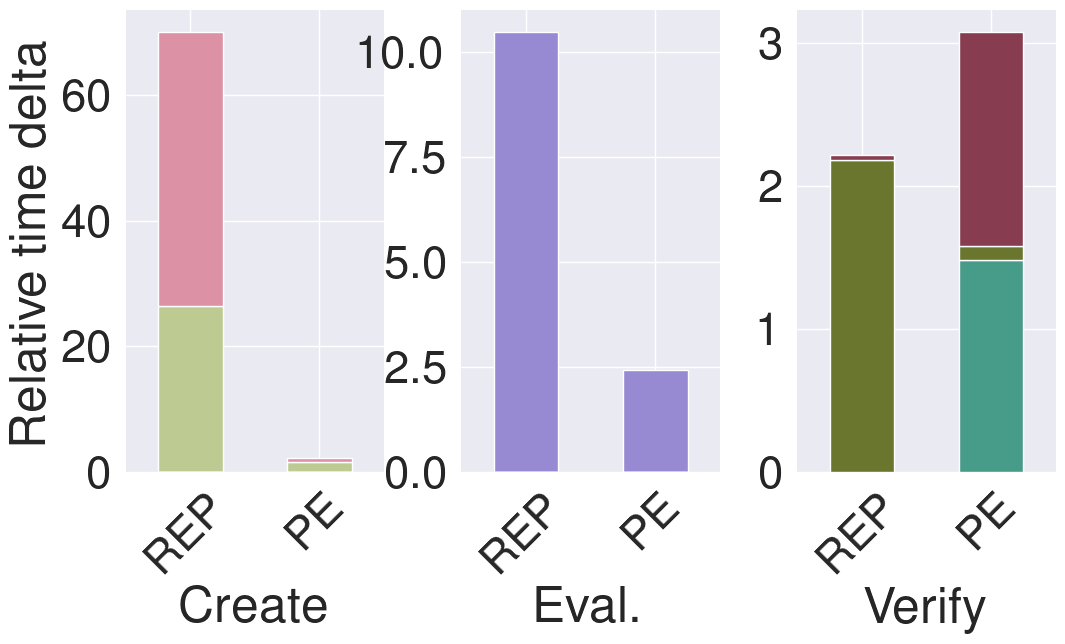

In [6]:
# Plot the barplot Relative DIFFERENCE with the baseline
timings_df = pd.DataFrame(createDFDiffR(timings))

n_subplots = len(timings_df.index.levels[0])
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=False, figsize=(12, 6))  # width, height
axes[0].set_ylabel('Relative time delta')

graph = dict(zip(timings_df.index.levels[0], axes[-n_subplots:]))
plots = list(map(lambda x: plot_function(x, graph[x], timings_df), graph))
fig.subplots_adjust(wspace=0.3)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Figures/barplotDS1000.pdf', bbox_inches='tight')
plt.show()

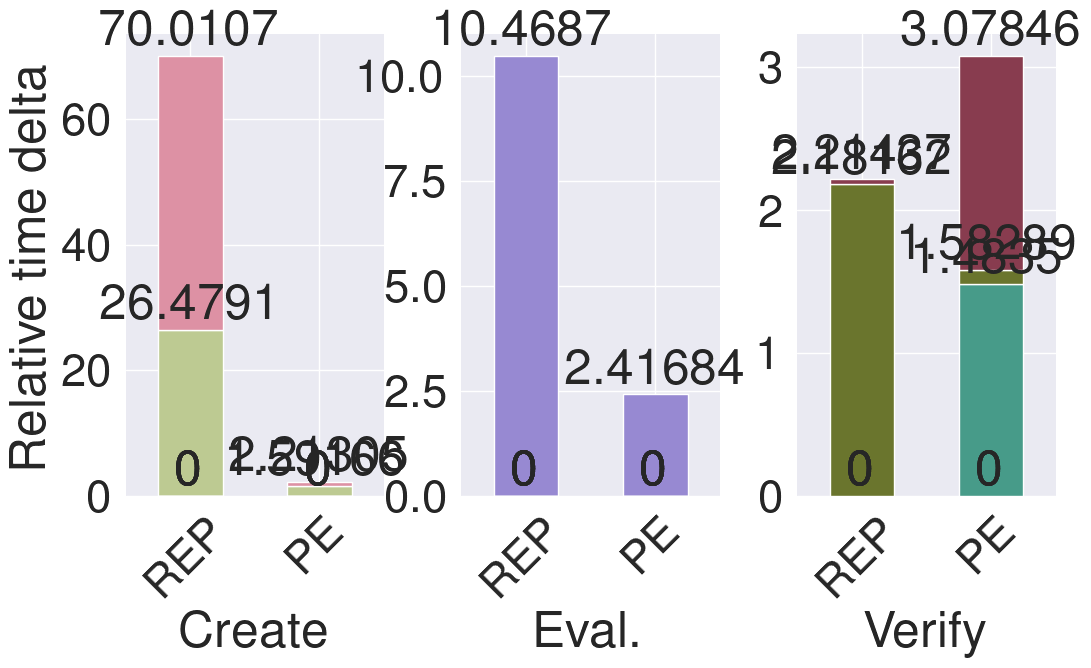

In [7]:
# Plot the barplot Relative DIFFERENCE with the baseline
timings_df = pd.DataFrame(createDFDiffR(timings))

n_subplots = len(timings_df.index.levels[0])
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=False, figsize=(12, 6))  # width, height

axes[0].set_ylabel('Relative time delta')

graph = dict(zip(timings_df.index.levels[0], axes[-n_subplots:]))
plots = list(map(lambda x: plot_functionVal(x, graph[x], timings_df), graph))
fig.subplots_adjust(wspace=0.3)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('Figures/barplotDS1000.pdf', bbox_inches='tight')
plt.show()